### 分词工具

In [1]:
import jieba

seg_list = jieba.cut("我来到北京清华大学", cut_all=True)
print("全模式: " + "/ ".join(seg_list))  # 全模式

seg_list = jieba.cut("我来到北京清华大学", cut_all=False)
print("精确模式: " + "/ ".join(seg_list))  # 精确模式

seg_list = jieba.cut("他来到了网易杭研大厦")  # 默认是精确模式
print(", ".join(seg_list))

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.782 seconds.
Prefix dict has been built successfully.


全模式: 我/ 来到/ 北京/ 清华/ 清华大学/ 华大/ 大学
精确模式: 我/ 来到/ 北京/ 清华大学
他, 来到, 了, 网易, 杭研, 大厦


#### 添加自定义词典

In [2]:
text = "故宫的著名景点包括乾清宫、太和殿和黄琉璃瓦等"

# 全模式
seg_list = jieba.cut(text, cut_all=True)
print(u"[全模式]: ", "/ ".join(seg_list))

# 精确模式
seg_list = jieba.cut(text, cut_all=False)
print(u"[精确模式]: ", "/ ".join(seg_list))

[全模式]:  故宫/ 的/ 著名/ 著名景点/ 景点/ 包括/ 乾/ 清宫/ 、/ 太和/ 太和殿/ 和/ 黄/ 琉璃/ 琉璃瓦/ 等
[精确模式]:  故宫/ 的/ 著名景点/ 包括/ 乾/ 清宫/ 、/ 太和殿/ 和/ 黄/ 琉璃瓦/ 等


In [3]:
jieba.load_userdict("./data/mydict.txt") #需UTF-8，可以在另存为里面设置

#也可以用jieba.add_word("乾清宫")

text = "故宫的著名景点包括乾清宫、太和殿和黄琉璃瓦等"

# 全模式
seg_list = jieba.cut(text, cut_all=True)
print(u"[全模式]: ", "/ ".join(seg_list))

# 精确模式
seg_list = jieba.cut(text, cut_all=False)
print(u"[精确模式]: ", "/ ".join(seg_list))

[全模式]:  故宫/ 的/ 著名/ 著名景点/ 景点/ 包括/ 乾清宫/ 清宫/ 、/ 太和/ 太和殿/ 和/ 黄琉璃瓦/ 琉璃/ 琉璃瓦/ 等
[精确模式]:  故宫/ 的/ 著名景点/ 包括/ 乾清宫/ 、/ 太和殿/ 和/ 黄琉璃瓦/ 等


#### 关键词抽取

In [4]:
import jieba.analyse

seg_list = jieba.cut(text, cut_all=False)
print (u"分词结果:")
print ("/".join(seg_list))

#获取关键词
tags = jieba.analyse.extract_tags(text, topK=5)
print (u"关键词:")
print (" ".join(tags))

分词结果:
故宫/的/著名景点/包括/乾清宫/、/太和殿/和/黄琉璃瓦/等
关键词:
著名景点 乾清宫 黄琉璃瓦 太和殿 故宫


In [5]:
tags = jieba.analyse.extract_tags(text, topK=5, withWeight=True)
for word, weight in tags:
    print(word, weight)

著名景点 2.3167796086666668
乾清宫 1.9924612504833332
黄琉璃瓦 1.9924612504833332
太和殿 1.6938346722833335
故宫 1.5411195503033335


#### 词性标注

In [6]:
import jieba.posseg as pseg
 
words = pseg.cut("我爱北京天安门")
for word, flag in words:
    print("%s %s" % (word, flag))

我 r
爱 v
北京 ns
天安门 ns


### 词云展示

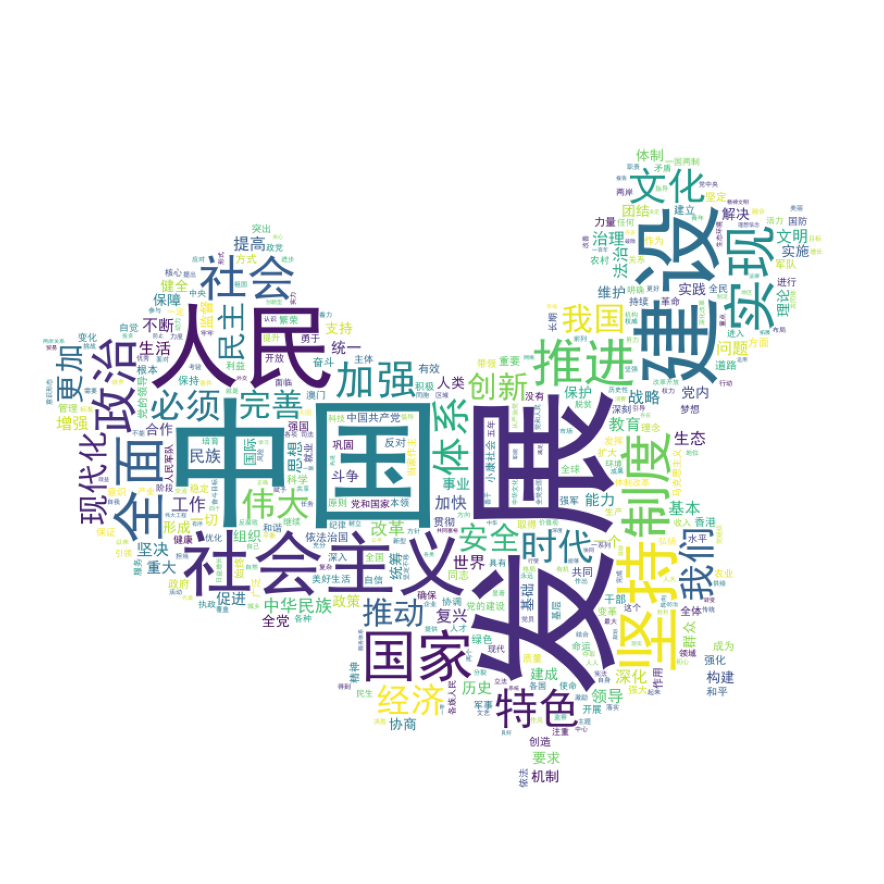

In [7]:
import jieba
from wordcloud import WordCloud
# from scipy.misc import imread
from imageio import imread
from collections import Counter
import matplotlib.pyplot as plt

data={}

text_file = open('./data/19Congress.txt','r',encoding='utf-8')
text = text_file.read()
with open('./data/stopwords.txt',encoding='utf-8') as file:
    stopwords = {line.strip() for line in file}

seg_list = jieba.cut(text, cut_all=False)
for word in seg_list:
    if len(word)>=2:
        if not data.__contains__(word):
            data[word]=0
        data[word]+=1
#print(data)      
 
my_wordcloud = WordCloud(  
    background_color='white',  #设置背景颜色
    max_words=400,  #设置最大实现的字数
    font_path=r'./data/SimHei.ttf',  #设置字体格式，如不设置显示不了中文
    mask=imread('./data/mapofChina.jpg'), #指定在什么图片上画
    width=1000,
    height=1000,
    stopwords = stopwords
).generate_from_frequencies(data)

plt.figure(figsize=(18,16))
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()  # 展示词云
my_wordcloud.to_file('result.jpg')
text_file.close()